## GLAO PSFs

Some helpful plots of PSFs with Moffatt profiles with different parameters. 


In [2]:
from imaka.analysis import moffat
import numpy as np
import pylab as plt


Plot a typical seeing-limited Moffat vs. a GLAO Moffat

In [8]:
def convert_fwhm_to_alpha(fwhm, beta):
    alpha = (fwhm / 2.0) / (2**(1./beta) - 1)**0.5
    return alpha


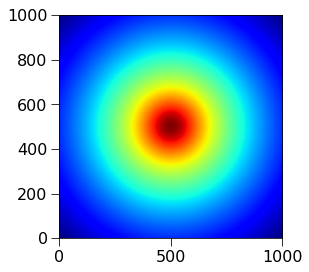

In [100]:
beta_noao = 4.5
beta_glao = 2.0
fwhm_noao = 0.8  # arcsec
fwhm_glao = fwhm_noao * 0.6 # arcsec
alpha_noao = convert_fwhm_to_alpha(fwhm_noao, beta_noao)
alpha_glao = convert_fwhm_to_alpha(fwhm_glao, beta_glao)

plate_scale = 0.01 # arcsec / pixel
fov_asec = 10.0  # arcsec
fov_pix = int(fov_asec / plate_scale) + 1

xx, yy = np.mgrid[0:fov_pix, 0:fov_pix]
xcenter = xx.max() / 2
ycenter = yy.max() / 2
rr = np.hypot(xx - xcenter, yy - ycenter)

mod_noao = moffat.Elliptical_Moffat2D(power=beta_noao, 
                                      width_x=alpha_noao/plate_scale, width_y=alpha_noao/plate_scale, 
                                      x_0=xcenter, y_0=ycenter)
mod_glao = moffat.Elliptical_Moffat2D(power=beta_glao, 
                                      width_x=alpha_glao/plate_scale, width_y=alpha_glao/plate_scale, 
                                      x_0=xcenter, y_0=ycenter)
psf_noao = mod_noao(xx, yy)
psf_glao = mod_glao(xx, yy)

# Normalize the PSFs to an integral of 1.
psf_noao /= psf_noao.sum()
psf_glao /= psf_glao.sum()

# Now integrate the PSFs azimuthally.
bins = np.arange(rr.max())
rbins = np.diff(bins) + bins[:-1]

(prof_noao, foo) = np.histogram(rr, bins, weights=psf_noao)
(prof_glao, foo) = np.histogram(rr, bins, weights=psf_glao)
(prof_npix, foo) = np.histogram(rr, bins)

# Radial Profiles
rprof_noao = prof_noao / prof_npix
rprof_glao = prof_glao / prof_npix

# Encircled Energy Curves
eeprof_noao = prof_noao.cumsum()
eeprof_glao = prof_glao.cumsum()

# Convert from pixels to arcsec and arcsec^2
rbins *= plate_scale
rprof_noao *= plate_scale**2
rprof_glao *= plate_scale**2

plt.clf()
plt.imshow(np.log10(psf_noao))


(0.1, 3)

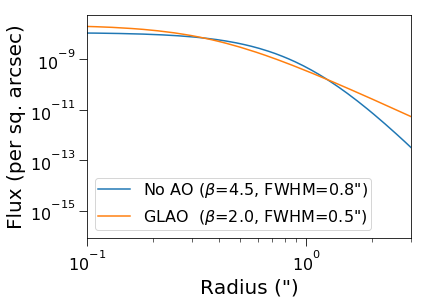

In [101]:

label_noao = r'No AO ($\beta$={0:.1f}, FWHM={1:.1f}")'.format(beta_noao, fwhm_noao)
label_glao = r'GLAO  ($\beta$={0:.1f}, FWHM={1:.1f}")'.format(beta_glao, fwhm_glao)

plt.clf()
plt.loglog(rbins, rprof_noao, label=label_noao)
plt.loglog(rbins, rprof_glao, label=label_glao)
plt.legend()
plt.xlabel('Radius (")')
plt.ylabel('Flux (per sq. arcsec)')
plt.xlim(0.1, 3)


(0.1, 3)

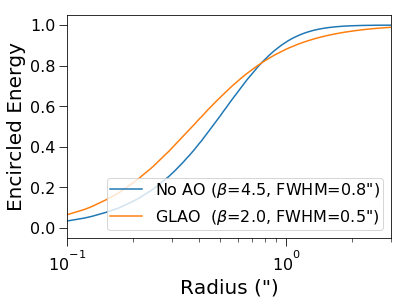

In [102]:
plt.clf()
plt.semilogx(rbins, eeprof_noao, label=label_noao)
plt.semilogx(rbins, eeprof_glao, label=label_glao)
plt.legend()
plt.xlabel('Radius (")')
plt.ylabel('Encircled Energy')
plt.xlim(0.1, 3)



(1e-13, 1e-07)

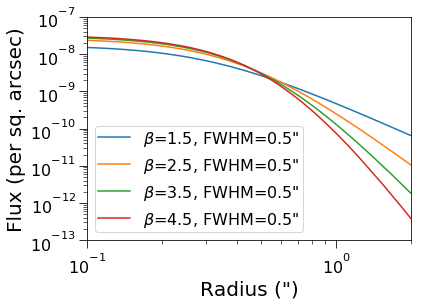

In [104]:
# Look at a range of beta for a fixed FWHM.
betas = np.array([1.5, 2.5, 3.5, 4.5])
fwhms = np.repeat(fwhm_glao, len(betas))
alpha = convert_fwhm_to_alpha(fwhms, betas)

plt.clf()
for bb in range(len(betas)):
    mod_psf = moffat.Elliptical_Moffat2D(power=betas[bb], 
                                         width_x=alpha[bb]/plate_scale, width_y=alpha[bb]/plate_scale, 
                                         x_0=xcenter, y_0=ycenter)
    psf = mod_psf(xx, yy)
    # Normalize the PSFs to an integral of 1.
    psf /= psf.sum()

    (rprof_psf, foo) = np.histogram(rr, bins, weights=psf)

    # Convert from pixels to arcsec and arcsec^2
    rprof_psf *= plate_scale**2 / prof_npix
    
    label = r'$\beta$={0:.1f}, FWHM={1:.1f}"'.format(betas[bb], fwhms[bb])
    plt.loglog(rbins, rprof_psf, label=label)

plt.legend()
plt.xlabel('Radius (")')
plt.ylabel('Flux (per sq. arcsec)')
plt.xlim(0.1, 2)
plt.ylim(1e-13, 1e-7)



(1e-13, 1e-07)

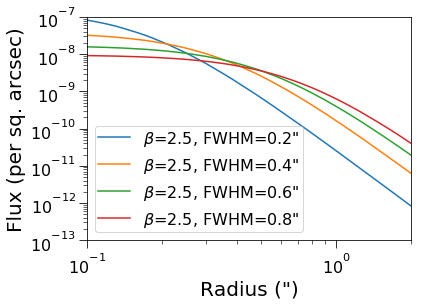

In [105]:
# Look at a range of beta for a fixed FWHM.
fwhms = np.array([0.2, 0.4, 0.6, 0.8])
betas = np.repeat(2.5, len(fwhms))
alphas = convert_fwhm_to_alpha(fwhms, betas)

plt.clf()
for bb in range(len(betas)):
    mod_psf = moffat.Elliptical_Moffat2D(power=betas[bb], 
                                         width_x=alphas[bb]/plate_scale, width_y=alphas[bb]/plate_scale, 
                                         x_0=xcenter, y_0=ycenter)
    psf = mod_psf(xx, yy)
    # Normalize the PSFs to an integral of 1.
    psf /= psf.sum()

    (rprof_psf, foo) = np.histogram(rr, bins, weights=psf)

    # Convert from pixels to arcsec and arcsec^2
    rprof_psf *= plate_scale**2 / prof_npix
    
    label = r'$\beta$={0:.1f}, FWHM={1:.1f}"'.format(betas[bb], fwhms[bb])
    plt.loglog(rbins, rprof_psf, label=label)

plt.legend()
plt.xlabel('Radius (")')
plt.ylabel('Flux (per sq. arcsec)')
plt.xlim(0.1, 2)
plt.ylim(1e-13, 1e-7)




## Seeing vs. GLAO

Compare the GLAO vs. seeing-limited PSFs in terms of the following relations:

- astrometric precison $\propto$ SNR / FWHM
- photometric precision (obj limited): $SNR \propto \sqrt{N_s}$
- photometric precision (bkg limited): $SNR \propto N_s / \sqrt{N_{sky}}$
- photometric precision (RN limited): $SNR \propto N_s / R$

We will take the ratios in the seeing vs. GLAO case. Note that I will calculate the improvements both for a fixed aperture and for a reduce aperture. The aperture reduction that will we adopt will be the ratio of the FWHM, even though this isn't exatly optimal. 

In [3]:
def calc_snr_rband(mag, aper_radius, tint, psf_1D):
    # psf_1D : profile in flux / sq.arcsec
    
    # Background Levels in the R-band: (3 lunar days)
    Rsky_dict = {'U': 21.5, 'B': 22.4, 'V': 21.7, 'R': 20.8, 'I': 19.9}  # mag / asec^2
    scale = {'LRIS-R': 0.135} # asec / pix
    ZP = {'B': 27.35, 'V': 27.52, 'R': 27.54, 'I': 27.43, }
    
    Rsky = 39.1       # e- / sec / pix  from http://www.astro.wisc.edu/~sheinis/ast500/AY500_lect5.ppt.pdf
    RN = 4.64         # e- / pix / read
    gain = 1.9        # e- / ADU
    dark = 0.            # e- / pix
    
    r_pix = aper_radius / scale['LRIS-R']
    
    # Make a 2D box of size r_pix... note we need to round.
    diam_pix = r_pix
    
    npix = math.pi * (aper_radius / scale['LRIS-R'])**2
    
    flux_inf = 10**((mag - ZP['R']) / -2.5)  # inifinte aperture flux.
    
    # Convert to flux inside an aperture.
    
        
    # flux = count rate from star (e- / sec)
    # Rsky = count rate from background (e- / sec / pix)
    # tint = exposure time (sec)
    # r = radius of aperture (pix)
    # npix = number of pixels in aperture (\pi * r^2)
    # gain = inverse gain (e- / DN)
    # dark = dark current (e- / sec / pix)
    SNR = (flux*tint) / ((flux*tint)  + (Rsky*tint*npix) + ((RN + (gain/2))**2 * npix) + (dark*npix*tint))**0.5
    
    return SNR
    

In [ ]:
mag = np.arange(9, 30, 0.1)
snr = calc_snr_rband(mag, )

Improvements in astrometric precision for the obj-limited case (extremely bright) are given by:

astrometric gain = G$_{ast}$ = ( SNR$_{GLAO}$ / SNR$_{see}$ ) *  ( FWHM$_{see}$ / FWHM$_{GLAO}$ )   
G$_{ast}$ = ( N$_{GLAO}$ / N$_{see}$ )$^{0.5}$ * ( FWHM$_{see}$ / FWHM$_{GLAO}$ )

G$_{phot}$ = ( N$_{GLAO}$ / N$_{see}$ )$^{0.5}$

Note, we will assume a fixed aperture. 
